<a href="https://colab.research.google.com/github/chizhang9135/CMU_FALL24_SEM_TEAM/blob/master/Project_Sprint_1_Agile_Sprint_Process_%26_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scanpy
!pip install cellxgene_census
!pip install --user scikit-misc

  Using cached scanpy-1.10.3-py3-none-any.whl.metadata (9.4 kB)
  Using cached anndata-0.11.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached legacy_api_wrap-1.4-py3-none-any.whl.metadata (1.8 kB)
  Using cached natsort-8.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached session_info-1.0.0.tar.gz (24 kB)
  Preparing metadata (setup.py) ... done
  Using cached statsmodels-0.14.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
  Using cached array_api_compat-1.9.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached stdlib_list-0.11.0-py3-none-any.whl.metadata (3.3 kB)
Using cached scanpy-1.10.3-py3-none-any.whl (2.1 MB)
Using cached anndata-0.11.0-py3-none-any.whl (141 kB)
Using cached legacy_api_wrap-1.4-py3-none-any.whl (15 kB)
Using cached pynndescent-0.5.

In [3]:
# Import Function

import urllib
import scanpy
import cellxgene_census

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from scipy.stats import ttest_ind
import re

/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr

In [4]:
cellxgene_census.download_source_h5ad("9813a1d4-d107-459e-9b2e-7687be935f69", to_path="data.h5ad")
adata = scanpy.read_h5ad("data.h5ad")
adata

Downloading: 100%|██████████| 229M/229M [00:08<00:00, 27.9MB/s]


AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [5]:
gens_dir = {'SLC26A3': 'ENSG00000091138',
            'RASGEF1B': 'ENSG00000138670',
            'RP11-701H24.9': 'ENSG00000214265',
            'LINGO1': 'ENSG00000169783',
            'PDE4DIP': 'ENSG00000178104',
            'AC159540.1': 'ENSG00000230606',
            'RP11-289H16.1': 'ENSG00000224363',
            'RP11-219A15.1': 'ENSG00000266302',
            'LINC01609': 'ENSG00000253103',
            'PHYHIP': 'ENSG00000168490',
            'RP11-745L13.2': 'ENSG00000251555'
            }
gens_name = list(gens_dir.keys())
gens_id = list(gens_dir.values())

In [6]:
adata  = adata[:,adata.var.index.isin(gens_id)]

In [7]:
# helper function
def extract_age(stage):
    match = re.search(r'\d+', stage)
    return int(match.group()) if match else None

<ipython-input-30-62f2741c5bcd>:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['age'] = adata.obs['development_stage'].apply(extract_age).astype(float)


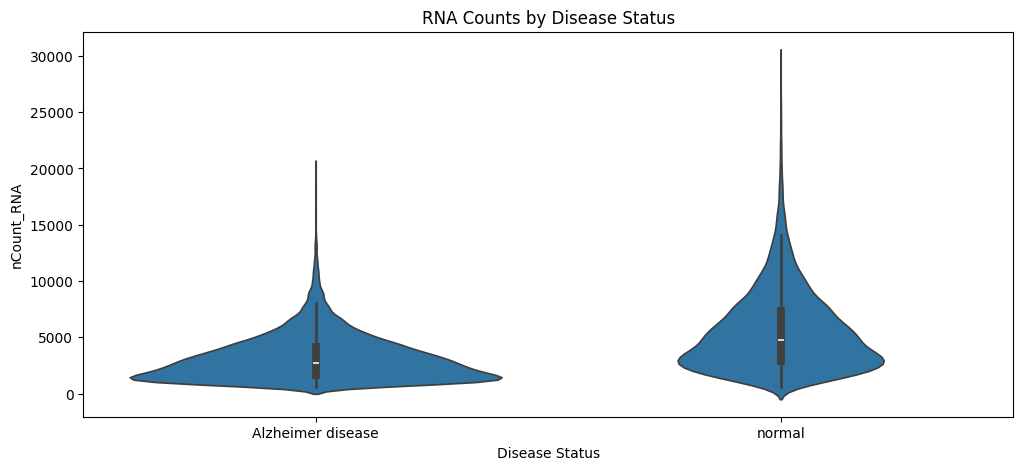

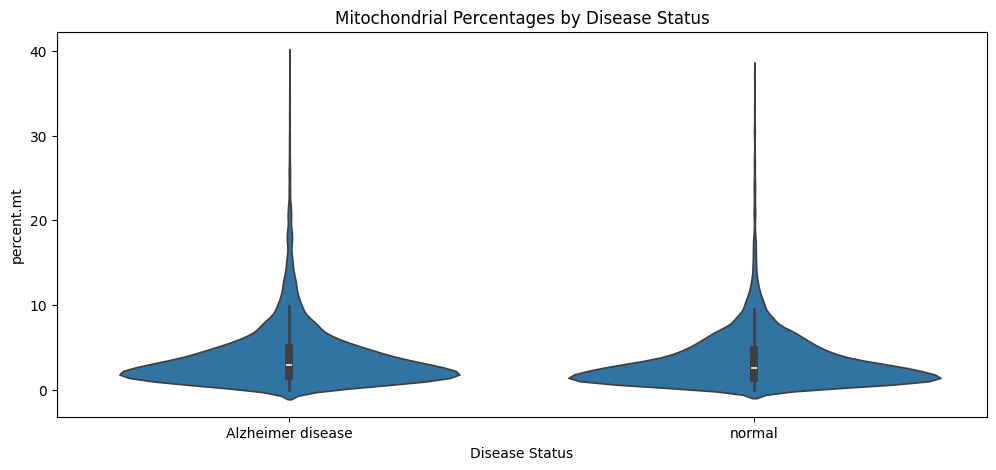

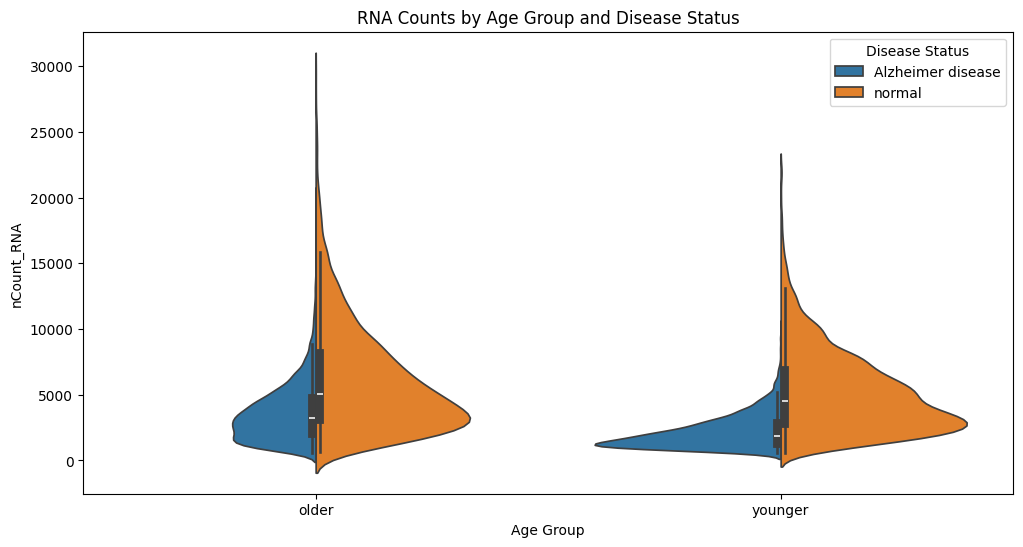

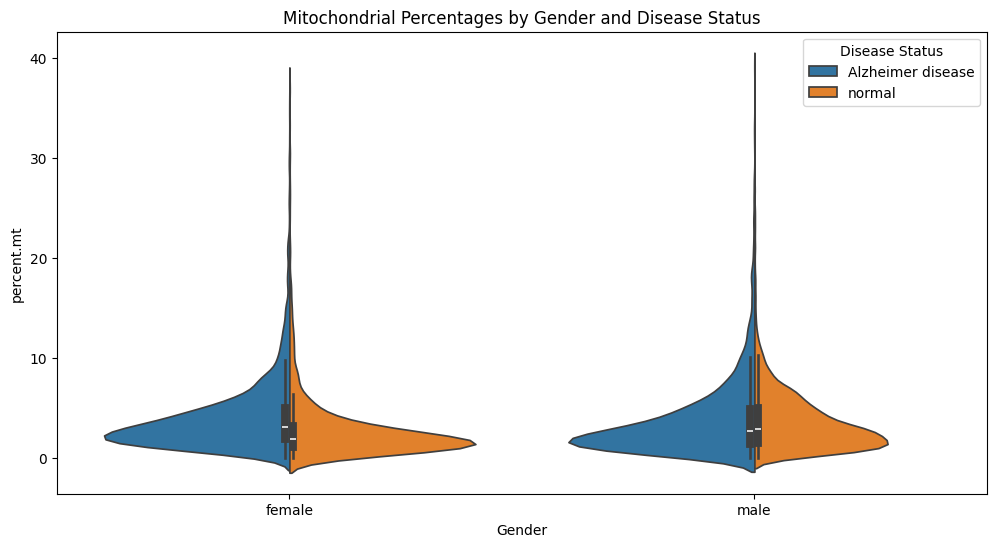

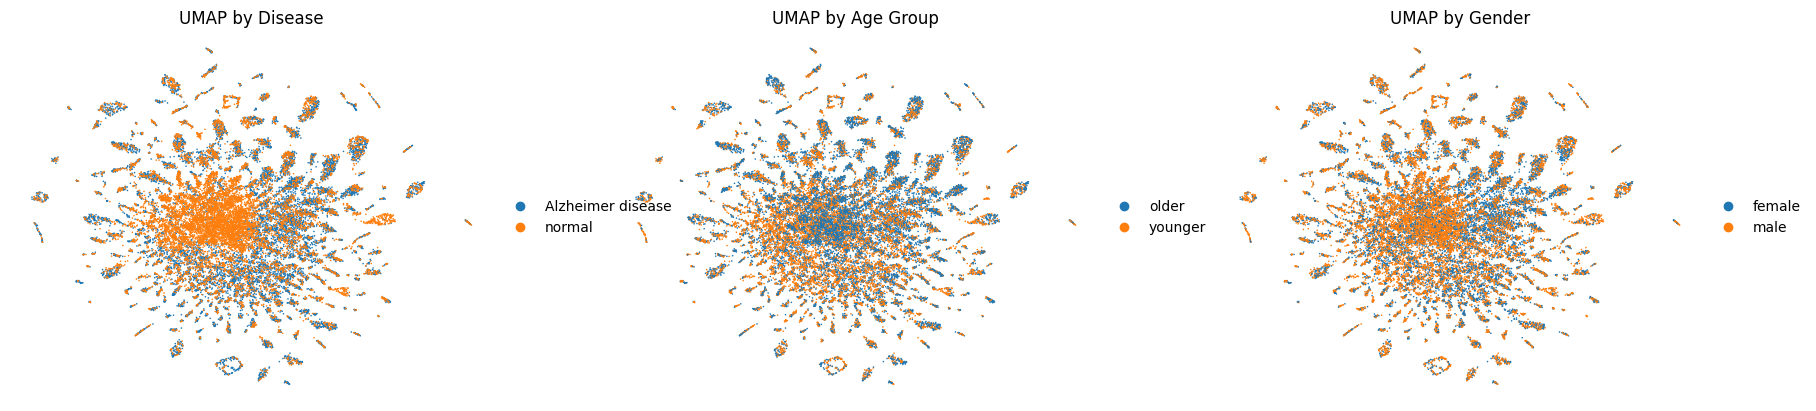

In [ ]:
adata.obs['age'] = adata.obs['development_stage'].apply(extract_age).astype(float)
adata_filtered = adata[(adata.obs['age'] >= 57) & (adata.obs['age'] <= 89)].copy()

adata_filtered = adata_filtered[adata_filtered.obs['disease'].isin(['Alzheimer disease', 'normal'])].copy()
adata_filtered.obs['disease_status'] = adata_filtered.obs['disease']


plt.figure(figsize=(12, 5))
sns.violinplot(x='disease_status', y='nCount_RNA', data=adata_filtered.obs)
plt.title("RNA Counts by Disease Status")
plt.xlabel("Disease Status")
plt.ylabel("nCount_RNA")
plt.show()


plt.figure(figsize=(12, 5))
sns.violinplot(x='disease_status', y='percent.mt', data=adata_filtered.obs)
plt.title("Mitochondrial Percentages by Disease Status")
plt.xlabel("Disease Status")
plt.ylabel("percent.mt")
plt.show()


adata_filtered.obs['age_group'] = adata_filtered.obs['age'].apply(lambda x: 'younger' if x <= 70 else 'older')
adata_filtered.obs['gender'] = adata_filtered.obs['sex']


plt.figure(figsize=(12, 6))
sns.violinplot(x='age_group', y='nCount_RNA', hue='disease_status', data=adata_filtered.obs, split=True)
plt.title("RNA Counts by Age Group and Disease Status")
plt.xlabel("Age Group")
plt.ylabel("nCount_RNA")
plt.legend(title="Disease Status")
plt.show()

# Violin plot to analyze mitochondrial percentages by gender and disease status
plt.figure(figsize=(12, 6))
sns.violinplot(x='gender', y='percent.mt', hue='disease_status', data=adata_filtered.obs, split=True)
plt.title("Mitochondrial Percentages by Gender and Disease Status")
plt.xlabel("Gender")
plt.ylabel("percent.mt")
plt.legend(title="Disease Status")
plt.show()

# Step 5: UMAP visualization to detect cellular subpopulations in AD and normal cohorts
sc.tl.pca(adata_filtered, svd_solver='arpack')
sc.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_filtered)
sc.pl.umap(adata_filtered, color=['disease_status', 'age_group', 'gender'], title=["UMAP by Disease", "UMAP by Age Group", "UMAP by Gender"], frameon=False)

The three UMAP (Uniform Manifold Approximation and Projection) plots presented illustrate the distribution and clustering of data points across three different dimensions—disease status, age group, and gender. The first plot (labeled “UMAP by Disease”) shows the distribution of individuals categorized as having Alzheimer’s disease (blue) or being normal (orange). There is a relatively high level of overlap between the two clusters, indicating that while there may be differences between the Alzheimer’s and normal groups, these differences are not entirely discrete. However, some regions of stronger clustering can be seen for either group, which might suggest the existence of some underlying patterns separating disease from normal status in the dataset.

The second plot (labeled “UMAP by Age Group”) separates data points into older (blue) and younger (orange) individuals. Similar to the disease plot, there is a significant overlap in the clusters, but there are also discernible groupings within each age cohort. The distribution suggests that age may play a role in the features being measured, with specific areas in the space being more densely populated by older or younger individuals. This could hint at age-dependent variations or characteristics within the data, although the degree of separation suggests a more complex relationship.

The third plot (labeled “UMAP by Gender”) categorizes individuals into female (blue) and male (orange). Here, the overlap is significant, and no distinct separation is immediately evident based on gender alone. This indicates that gender may not have a strong influence on the primary dimensions captured by this UMAP representation. The dense overlapping of male and female clusters suggests that any gender-based distinctions are relatively subtle and may require more specific analysis or alternative dimensions to identify clear patterns. Overall, while each demographic factor (disease status, age, gender) has some effect on the data distribution, none provide a strong, standalone separation, highlighting the complexity and multifactorial nature of the data.

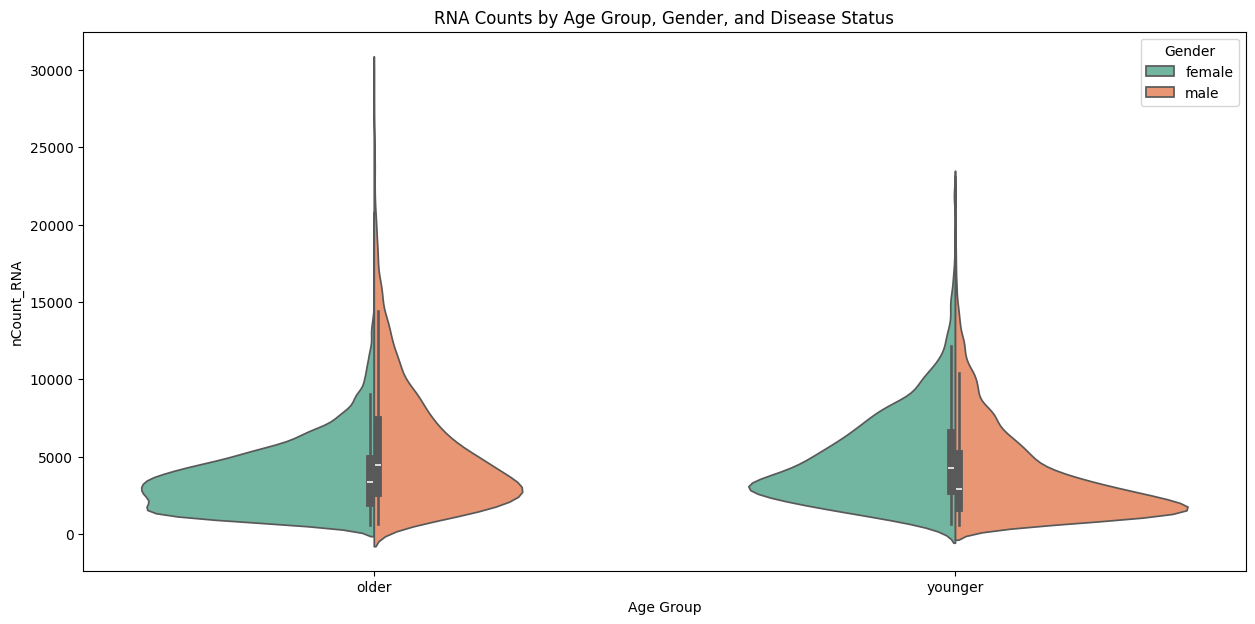

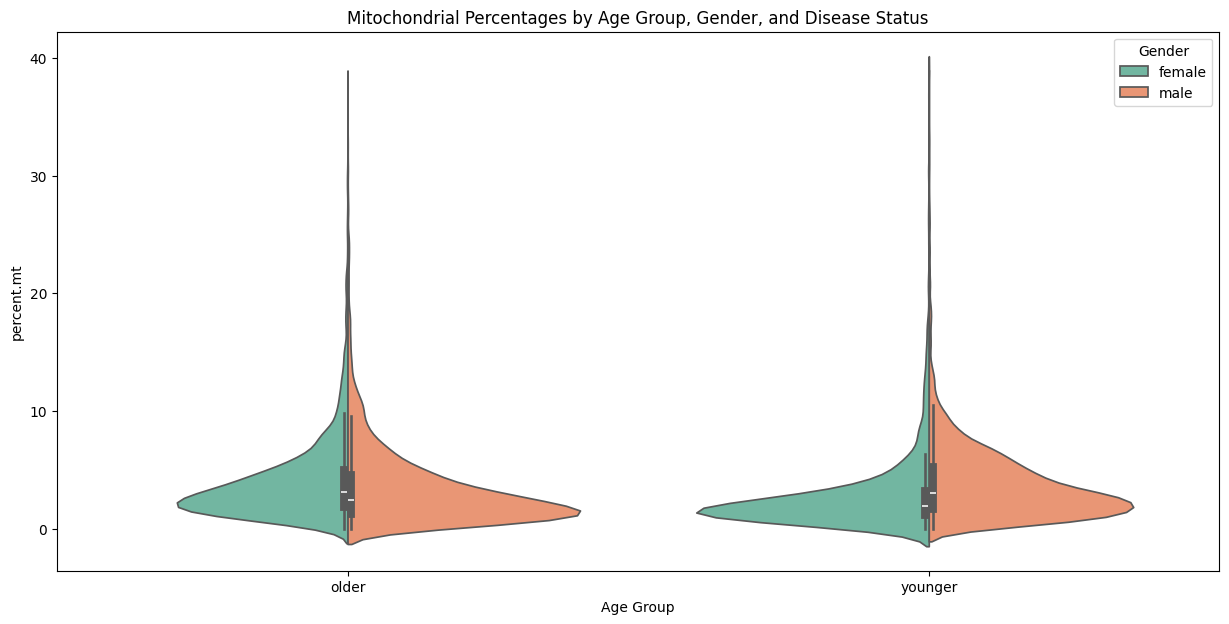

In [10]:
adata_filtered = adata[(adata.obs['age'] >= 57) & (adata.obs['age'] <= 89)].copy()
adata_filtered.obs['disease_status'] = adata_filtered.obs['disease']
adata_filtered.obs['age_group'] = adata_filtered.obs['age'].apply(lambda x: 'younger' if x <= 70 else 'older')
adata_filtered.obs['gender'] = adata_filtered.obs['sex']

plt.figure(figsize=(15, 7))
sns.violinplot(x='age_group', y='nCount_RNA', hue='gender', data=adata_filtered.obs, split=True, palette='Set2')
plt.title("RNA Counts by Age Group, Gender, and Disease Status")
plt.xlabel("Age Group")
plt.ylabel("nCount_RNA")
plt.legend(title="Gender")
plt.show()

plt.figure(figsize=(15, 7))
sns.violinplot(x='age_group', y='percent.mt', hue='gender', data=adata_filtered.obs, split=True, palette='Set2')
plt.title("Mitochondrial Percentages by Age Group, Gender, and Disease Status")
plt.xlabel("Age Group")
plt.ylabel("percent.mt")
plt.legend(title="Gender")
plt.show()

The provided violin plots illustrate RNA counts and mitochondrial percentages segmented by age group, gender, and disease status.

1.	RNA Counts by Age Group, Gender, and Disease Status:
The first plot shows the distribution of RNA counts across two age groups, “older” and “younger,” and stratified by gender (female and male). There appears to be a higher concentration of RNA counts around the median for both genders across the age groups, with a relatively broad distribution. Notably, male and female individuals display a somewhat comparable distribution across both age categories, though some slight differences in density peaks can be observed. Both age groups show long tails in the distribution, suggesting the presence of individuals with exceptionally high RNA counts. This indicates variability within RNA counts, but the overlap suggests that gender might not lead to a distinct separation within age groups.

2.	Mitochondrial Percentages by Age Group, Gender, and Disease Status:
The second plot focuses on the distribution of mitochondrial percentages across age groups and genders. Similar to the RNA counts, the distribution shows considerable overlap between male and female groups, with the median values being relatively close. There is a noticeable variability in mitochondrial percentages, especially with a long tail extending to higher values. This may indicate potential outliers or subpopulations with elevated mitochondrial percentages within each age group. The older and younger groups do not show a pronounced separation based solely on gender, which suggests that mitochondrial percentages may not differ significantly between genders within these age brackets.

Overall, both plots indicate that while age and gender may have some influence on RNA counts and mitochondrial percentages, there is considerable overlap, suggesting that other factors or combinations of features may drive greater differences in the data. Further stratification by disease status and deeper exploration of the underlying biological variability would likely provide more insight into these distributions.